## 人脸识别
1. 人脸有不同的颜色组成
2. 不同的颜色由三原色：红绿蓝组成
3. 红绿蓝由0~255的数字组成

### 所以人脸是由数据组成的

In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

### 使用matplotlib.pyplot导入数据图片并显示,观察这张图片的数据类型

## 进行人脸识别操作
1.导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、loggin等  


2.设置logging，控制台显示程序处理数据的进度  


3.使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地  


4.查看人脸数据结构  


5.从人脸数据中提取进行机器学习的关键数据  


6.对数据进行分割，获取训练数据和测试数据  


7.数据太复杂了，使用PCA对数据进行降维处理，去除一些不重要的数据  


8.使用GridSerchCV查询最佳的机器学习模型  


9.定义方法获取预测人名和真实人名  


10.定义方法绘制人脸识别结果图形  


11.调用方法进行数据展示  


导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、logging等 

In [4]:
# labeled face wild
# min_faces_per_person 一个人最少有几张照片
faces = datasets.fetch_lfw_people(resize=1, min_faces_per_person=70)
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [5]:
X = faces['data']

y = faces['target']

names = faces['target_names']

In [6]:
X.shape

(1288, 11750)

Gerhard Schroeder


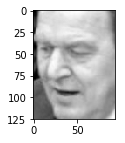

In [12]:
index = np.random.randint(1288, size=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(X[index].reshape(125, 94), cmap='gray')

print(names[y[index]])

设置logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  
控制台输出记录数据，显示程序处理数据的进度

使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地

查看人脸数据结构

In [8]:
# 降维, 归一化(一定要进行,不然准确率很低)
pca = PCA(n_components=0.95, whiten=True)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [9]:
X.shape

(1288, 11750)

In [10]:
X_pca = pca.transform(X)
X_pca.shape

(1288, 224)

从人脸数据中提取进行机器学习的关键数据

分割训练数据和预测数据

In [11]:
X_train, X_test, X_train_pca, X_test_pca, y_train, y_test = train_test_split(X, X_pca, y, test_size=0.2)

使用PCA进行降维

使用GridSearchCV我们找到了最佳的支持向量机方法

In [13]:
from sklearn.svm import SVC

In [14]:
%%time
svc = SVC()

# C有5个, gamma5个,参数交叉5*5=25次
clf = GridSearchCV(svc, param_grid={'C': [0.001, 0.1, 1, 10, 20], 'gamma': [0.0001, 0.001, 0.0044, 0.01, 0.1]})

clf.fit(X_train_pca, y_train)

H:\env\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 30 s


In [15]:
clf.best_params_

{'C': 20, 'gamma': 0.001}

In [16]:
clf.best_score_

0.8

进行数据预测

In [17]:
y_ = clf.predict(X_test_pca)
y_ 

array([4, 6, 1, 1, 1, 2, 1, 6, 3, 1, 1, 3, 1, 4, 1, 5, 3, 1, 4, 3, 3, 0,
       2, 3, 1, 3, 6, 4, 5, 3, 3, 3, 3, 1, 0, 1, 2, 3, 6, 6, 1, 3, 3, 3,
       3, 2, 3, 1, 1, 1, 6, 3, 3, 3, 6, 3, 4, 3, 4, 3, 3, 3, 1, 3, 3, 2,
       3, 4, 3, 6, 1, 3, 6, 3, 4, 0, 3, 1, 3, 3, 4, 6, 3, 3, 3, 3, 1, 4,
       1, 2, 3, 1, 3, 2, 3, 6, 6, 3, 1, 3, 5, 1, 5, 3, 3, 3, 1, 1, 3, 3,
       3, 6, 3, 1, 1, 4, 3, 3, 3, 3, 3, 0, 0, 6, 3, 3, 4, 2, 0, 6, 3, 3,
       0, 0, 3, 2, 6, 3, 2, 2, 3, 1, 1, 3, 2, 6, 3, 1, 3, 1, 3, 3, 3, 3,
       0, 1, 1, 1, 4, 1, 5, 1, 3, 2, 5, 4, 3, 3, 1, 1, 6, 3, 6, 0, 1, 5,
       5, 3, 1, 0, 2, 0, 3, 6, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 1,
       4, 1, 2, 1, 3, 1, 3, 3, 3, 2, 0, 3, 3, 6, 3, 6, 6, 3, 0, 4, 6, 3,
       0, 3, 2, 3, 4, 3, 2, 4, 6, 1, 4, 3, 0, 2, 4, 6, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 6, 1, 0, 3, 3, 3, 6, 5, 2, 4, 3, 1, 3], dtype=int64)

In [18]:
(y_ == y_test).mean()

0.7751937984496124

定义方法获取预测人名和真实人名 

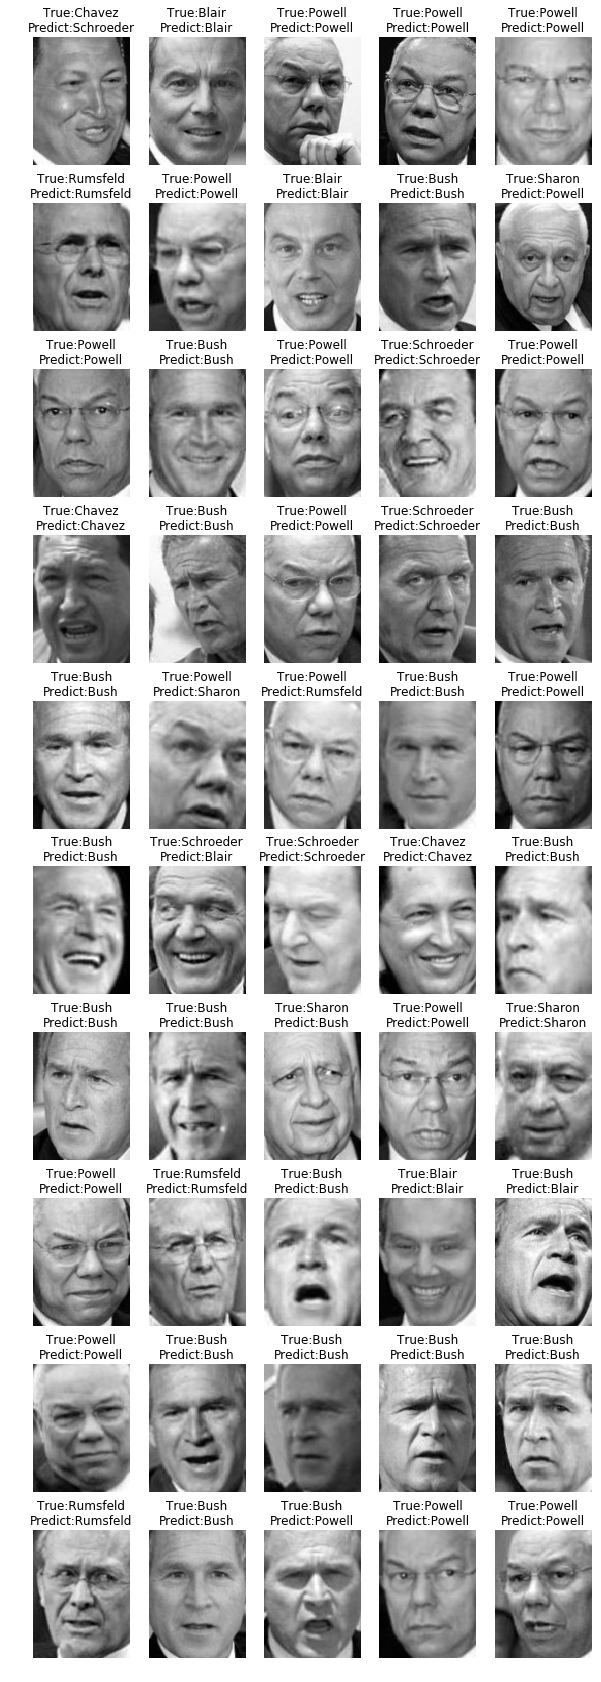

In [19]:
plt.figure(figsize=(5*2, 10*3))
for i in range(50):
    axes = plt.subplot(10, 5, i+1)
    
    axes.imshow(X_test[i].reshape(125, 94), cmap='gray')
    axes.axis('off')
    
    # 设置标题
    # 真实数据y_test
    # 预测数据y_
    t = names[y_test[i]].split(' ')[-1]
    p = names[y_[i]].split(' ')[-1]
    axes.set_title('True:{0}\nPredict:{1}'.format(t, p))

In [21]:
for i in range(7):
    n = names[i]
    count = (y == i).sum()
    print(n, count)

Ariel Sharon 77
Colin Powell 236
Donald Rumsfeld 121
George W Bush 530
Gerhard Schroeder 109
Hugo Chavez 71
Tony Blair 144


In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE()

X2, y2 = smote.fit_sample(X, y)

In [24]:
X2.shape

(3710, 11750)

In [25]:
for i in range(7):
    n = names[i]
    count = (y2 == i).sum()
    print(n, count)

Ariel Sharon 530
Colin Powell 530
Donald Rumsfeld 530
George W Bush 530
Gerhard Schroeder 530
Hugo Chavez 530
Tony Blair 530


In [27]:
# 将数据分成训练数据和测试数据,划分样本比例不变
from sklearn.model_selection import StratifiedKFold, KFold

In [28]:
# 示例

a = np.random.randn(8, 2)

b = np.array([0, 0, 1, 1, 1, 0, 0, 1])


In [30]:
sKFold = StratifiedKFold(n_splits=4)

for train, test in sKFold.split(a, b):
    print(train, test)

[1 3 4 5 6 7] [0 2]
[0 2 4 5 6 7] [1 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [29]:
# 分为4份
kFold = KFold(n_splits=4)

# train, test代表索引
for train, test in kFold.split(a, b):
    print(train, test)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [31]:
# 图片数据均衡化

pca = PCA(n_components=0.95, whiten=True)

pca.fit(X2)

X2_pca = pca.transform(X2)

In [33]:
X2_pca.shape

(3710, 193)

In [34]:
clf.best_params_

{'C': 20, 'gamma': 0.001}

In [37]:
%%time
sKFold = StratifiedKFold(n_splits=4)

svc = SVC(C=20, gamma=0.001)

scores = []

for train, test in sKFold.split(X2_pca, y2):
    X2_train_pca = X2_pca[train]
    y2_train = y2[train]
    
    X2_test_pca = X2_pca[test]
    y2_test = y2[test]
    
    svc.fit(X2_train_pca, y2_train)
    
    svc.score(X2_test_pca, y2_test)
    
    scores.append(svc.score(X2_test_pca, y2_test))
    
print('样本均衡后,准确率: {0:.4f}'.format(np.mean(scores)))

样本均衡后,准确率: 0.9825
Wall time: 6.45 s


调用方法获取人脸预测的名字，以及人脸的真实名字

定义方法绘制人脸识别结果图形

调用方法，显示数据

网络上查找图片使用机器学习模型进行预测

读取网络数据进行灰度处理gray = [0.299,0.587,0.114]  
如果是jpg图片进行归一化操作

如果图片尺寸不符合要求，那么修改尺寸